In [1]:
%matplotlib inline

# 1. Load Data

In [2]:
from keras.datasets import mnist

Using TensorFlow backend.


In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_images)

60000

## 1.1 Take a look at the data

The number is 5


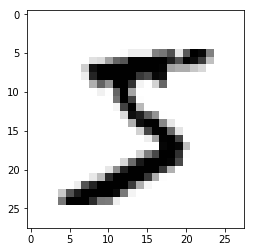

In [6]:
idx = 0
num = train_images[idx]
import matplotlib.pyplot as plt
plt.imshow(num, cmap=plt.cm.binary)
print("The number is {}".format(train_labels[idx]))

# 2. Data Manipulation

In [7]:
def preprocess(data):
    # assert(data.shape[1:] == (28, 28))
    nsamples, x, y = data.shape
    data = data.reshape((nsamples, x * y))
    data = data.astype('float32') / 255
    return data

train_images = preprocess(train_images)
test_images = preprocess(test_images);

In [8]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# 3. Define Architecture of the Network

In [9]:
from keras import models, layers

In [10]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))

In [11]:
# check the network
from keras.utils import plot_model
plot_model(network, to_file='model.png')

In [12]:
!ls

mnist_example.ipynb  model.png


![model](model.png)

# 4. Pick Optimizer, Loss function

In [13]:
network.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics = ['accuracy'])

# 5. Train

In [14]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 1s 18us/step - loss: 0.2620 - acc: 0.9235
Epoch 2/5
60000/60000 [==============================] - 1s 10us/step - loss: 0.1062 - acc: 0.9693
Epoch 3/5
60000/60000 [==============================] - 1s 9us/step - loss: 0.0692 - acc: 0.9794
Epoch 4/5
60000/60000 [==============================] - 1s 9us/step - loss: 0.0496 - acc: 0.9849
Epoch 5/5
60000/60000 [==============================] - 1s 10us/step - loss: 0.0376 - acc: 0.9886


In [15]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc: {}'.format(test_acc))

10000/10000 [==============================] - 0s 14us/step
test_acc: 0.9772


# 6. Check the result

In [16]:
test_images.shape

(10000, 784)

In [17]:
test_images[0].shape

(784,)

In [18]:
network.predict_classes(x=test_images[0:1, :])

array([7])

Prediction of the below number is 7.


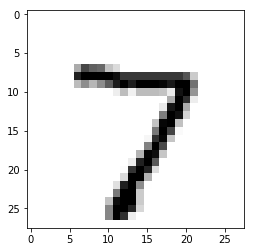

In [19]:
idx = 0
plt.imshow(test_images[idx].reshape(28, 28), cmap=plt.cm.binary)
prediction = network.predict_classes(x=test_images[idx:idx + 1, :])
print("Prediction of the below number is {}.".format(prediction[0]))

# 6.1 Check the wrongs

In [20]:
import numpy as np

In [21]:
predictions = network.predict_classes(test_images)

In [22]:
labels = np.argmax(test_labels, axis=1)

In [23]:
wrongs = np.nonzero(predictions != labels)[0]

Prediction of the below number is 8.
Correct number is 3.


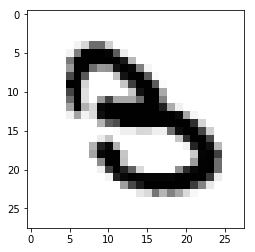

In [24]:
plt.imshow(test_images[wrongs[0]].reshape(28, 28), cmap=plt.cm.binary)
print("Prediction of the below number is {}.".format(predictions[wrongs[0]]))
print("Correct number is {}.".format(labels[wrongs[0]]))